Acoustic Trap force analysis

In [28]:
from acoustools.Mesh import load_scatterer
from acoustools.Utilities import TOP_BOARD, create_points
from acoustools.Solvers import wgs, gorkov_target
from acoustools.BEM import compute_E, propagate_BEM_pressure, BEM_gorkov_analytical, propagate_BEM, get_cache_or_compute_H
from acoustools.Visualiser import Visualise
import acoustools.Constants as c
from BEM_trap_force import BEM_trap_force

import vedo, torch

In [7]:
path = r"C:\Users\Abdullah Saeed\Documents\BEMMedia\Nonflat-lam2.stl"

reflector = load_scatterer(path,dz=-0.05)

p = create_points(1,1,x=0,y=0,z=0)
# p = create_points(5,1,x=0,y=0,z=0)

H = get_cache_or_compute_H(reflector, TOP_BOARD,path=r"C:\Users\Abdullah Saeed\Documents\BEMMedia")

E = compute_E(reflector,points=p,board=TOP_BOARD,path=r"C:\Users\Abdullah Saeed\Documents\BEMMedia",H=H)
# x = wgs(p,A=E)
x = gorkov_target(p, board=TOP_BOARD, U_targets=torch.tensor([-7.5e-6]), reflector=reflector, path=r"C:\Users\Abdullah Saeed\Documents\BEMMedia")

A = torch.tensor((-0.09,0, 0.09))
B = torch.tensor((0.09,0, 0.09))
C = torch.tensor((-0.09,0, -0.09))
normal = (0,1,0)
origin = (0,0,0)

# Visualise(A,B,C, x, colour_functions=[propagate_BEM_pressure],colour_function_args=[{"scatterer":reflector,"board":TOP_BOARD,"path":r"C:\Users\Abdullah Saeed\Documents\BEMMedia"}],vmax=5000, show=True,res=[256,256],points=p)

trap_up = p
trap_up[:,2] += c.wavelength/4

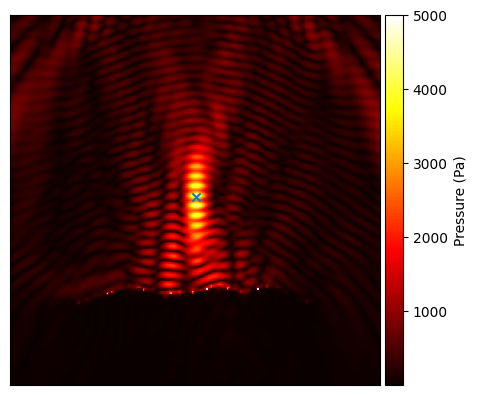

In [3]:
Visualise(A,B,C, x, colour_functions=[propagate_BEM_pressure],colour_function_args=[{"scatterer":reflector,"board":TOP_BOARD,"path":r"C:\Users\Abdullah Saeed\Documents\BEMMedia",'H':H}],vmax=5000, show=True,res=[256,256],points=trap_up)

In [29]:
print("trap up: ", trap_up)
# print("bem pressure: ", propagate_BEM_pressure(x,trap_up,reflector,TOP_BOARD,path=r"C:\Users\Abdullah Saeed\Documents\BEMMedia",H=H))
# print("gorkov potential: ", BEM_gorkov_analytical(x,trap_up,reflector,TOP_BOARD,path=r"C:\Users\Abdullah Saeed\Documents\BEMMedia",H=H))
# can add argument of delta, defaulted to 1e-6
print("trap force (Fx, Fy, Fz): ", BEM_trap_force(x,trap_up,reflector,TOP_BOARD,path=r"C:\Users\Abdullah Saeed\Documents\BEMMedia",H=H, return_components=True))
print("trap force (F): ", BEM_trap_force(x,trap_up,reflector,TOP_BOARD,path=r"C:\Users\Abdullah Saeed\Documents\BEMMedia",H=H, return_components=False))

trap up:  tensor([[[0.0000],
         [0.0000],
         [0.0021]]])
trap force (Fx, Fy, Fz):  tensor([[[-2.7967e-05],
         [ 2.7057e-05],
         [-1.4521e-03]]], grad_fn=<CopySlices>)
trap force (F):  tensor([[-0.0015]], grad_fn=<SumBackward1>)
